# CSCI 183 HW 2: Regression for Diabetes Dataset


## 1. Load the Diabetes Dataset


In [19]:
import sklearn
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [20]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df

## 2. Identify the 4 Most Linearly Correlated Feature

## 3. Identify the 2 Features that do not have an association


In [21]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [22]:
#bmi correlation of 0.586, #s5 with correlation of 0.565
#s3 correlation -0.395, #sex with correlation 0.043

In [23]:
target_df = df[df.columns[0:]].corr()['target'][:]
target_df

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

In [24]:
new_df = target_df.drop('target')
new_df

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
Name: target, dtype: float64

In [25]:
print("The feature with the strongest positive, linear correlation coefficient is: ", df.idxmax())
print(f'The correlation coefficient of this is', df.max())

print("The feature with the strongest negative, linear correlation coefficient is: ", df.idxmin())
print(f'The correlation coefficient of this is', df.min())


The feature with the strongest positive, linear correlation coefficient is:  age       204
sex         0
bmi       367
bp        340
s1        230
s2        123
s3         58
s4        123
s5         23
s6         23
target    256
dtype: int64
The correlation coefficient of this is age         0.110727
sex         0.050680
bmi         0.170555
bp          0.132044
s1          0.153914
s2          0.198788
s3          0.181179
s4          0.185234
s5          0.133597
s6          0.135612
target    346.000000
dtype: float64
The feature with the strongest negative, linear correlation coefficient is:  age        26
sex         1
bmi       281
bp        224
s1         76
s2        379
s3         32
s4          5
s5        110
s6        406
target    156
dtype: int64
The correlation coefficient of this is age       -0.107226
sex       -0.044642
bmi       -0.090275
bp        -0.112399
s1        -0.126781
s2        -0.115613
s3        -0.102307
s4        -0.076395
s5        -0.126097
s6      

## 4. Perform Simple Linear Regression on each feature

## 5. Evaluate the Model for each feature

## 6. Visualize the Results:


MSE for age is:  5720.5470172056475


The coefficient for the model with feature age is 304.18307452830607
The intercept for the model with feature age is 152.13348416289594


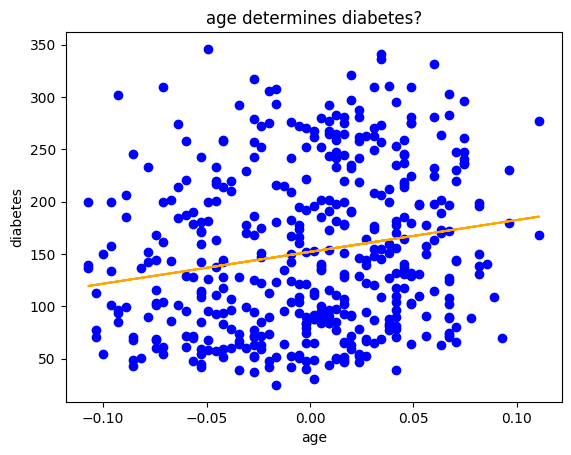

MSE for sex is:  5918.888899586022


The coefficient for the model with feature sex is 69.71535567841462
The intercept for the model with feature sex is 152.13348416289594


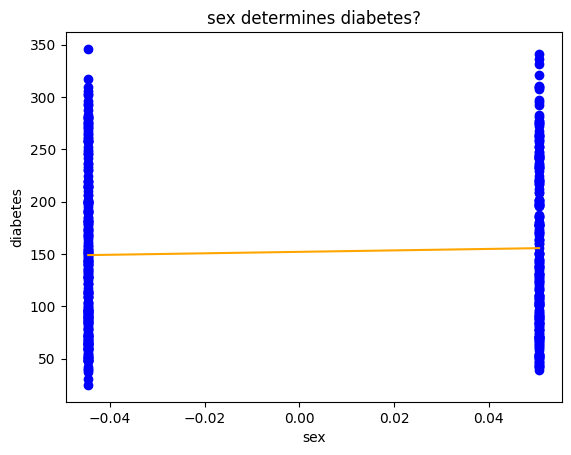

MSE for bmi is:  3890.456585461273


The coefficient for the model with feature bmi is 949.4352603840387
The intercept for the model with feature bmi is 152.13348416289617


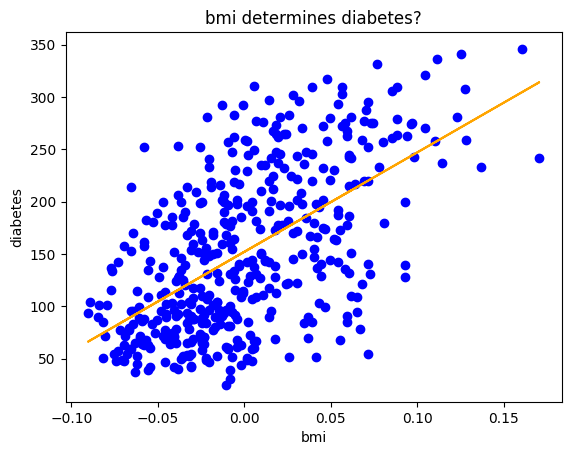

MSE for bp is:  4774.113902368687


The coefficient for the model with feature bp is 714.7382594960411
The intercept for the model with feature bp is 152.13348416289597


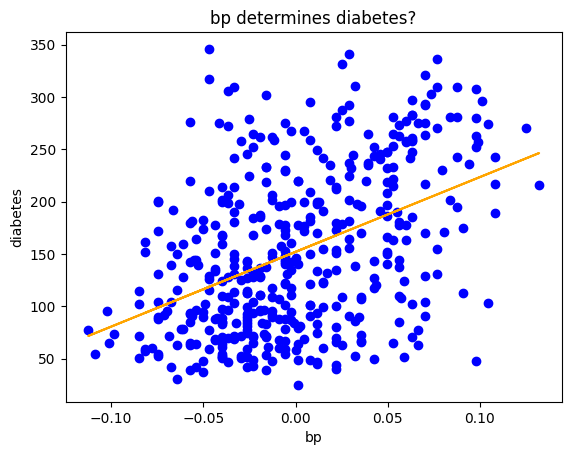

MSE for s1 is:  5663.315623739354


The coefficient for the model with feature s1 is 343.25445188896657
The intercept for the model with feature s1 is 152.13348416289594


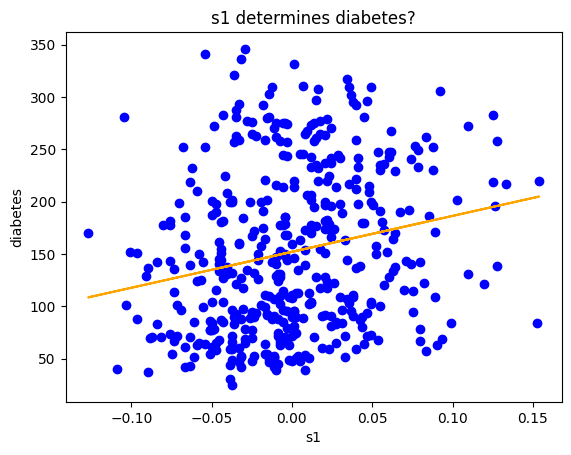

MSE for s2 is:  5750.241102677782


The coefficient for the model with feature s2 is 281.78459335245714
The intercept for the model with feature s2 is 152.13348416289594


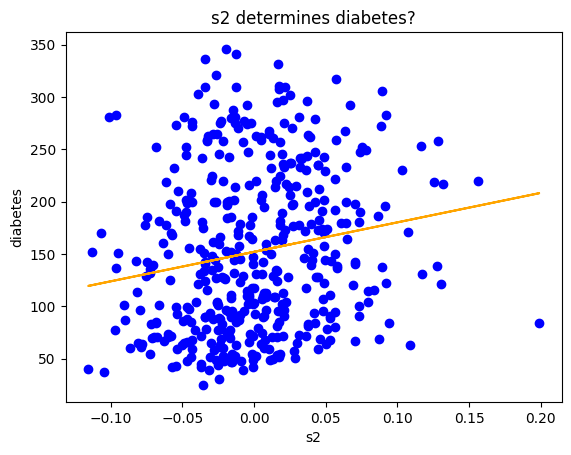

MSE for s3 is:  5005.661620710652


The coefficient for the model with feature s3 is -639.145279322535
The intercept for the model with feature s3 is 152.13348416289594


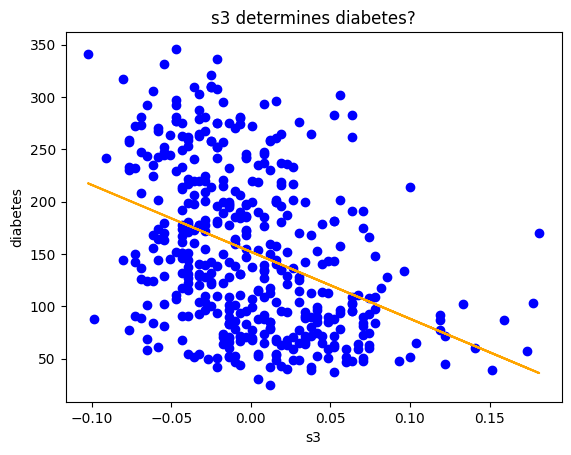

MSE for s4 is:  4831.13838643409


The coefficient for the model with feature s4 is 696.8830300922251
The intercept for the model with feature s4 is 152.13348416289594


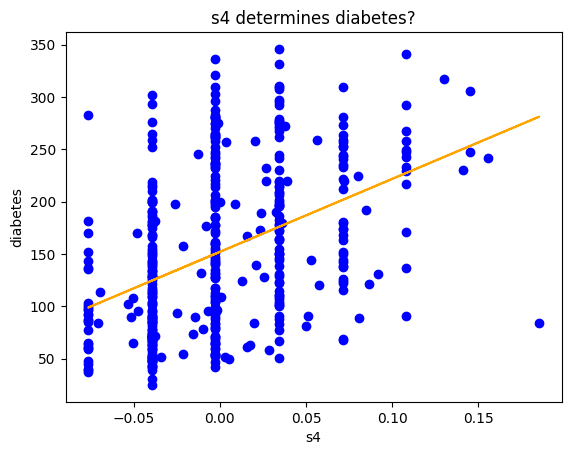

MSE for s5 is:  4030.998722591287


The coefficient for the model with feature s5 is 916.1373745509138
The intercept for the model with feature s5 is 152.13348416289585


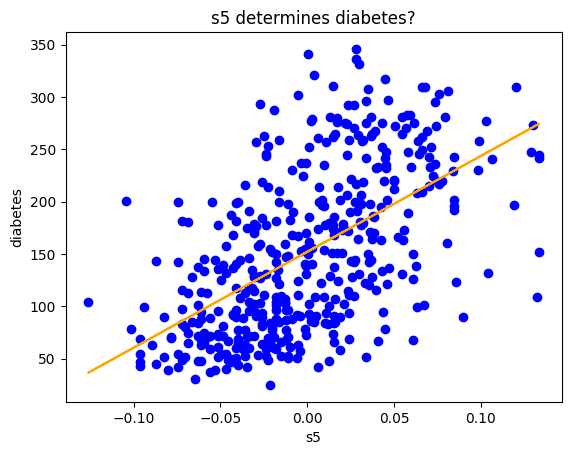

MSE for s6 is:  5062.380594520543


The coefficient for the model with feature s6 is 619.2228206843714
The intercept for the model with feature s6 is 152.13348416289594


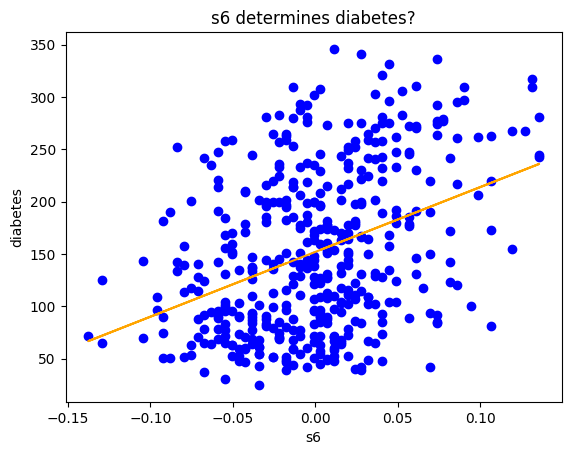

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


linear_model = LinearRegression()

for col in df.columns[:-1]: 
    X = df[[col]]
    y = df['target']

   # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    linear_model.fit(X, y)

    y_pred = linear_model.predict(X)

    print(f'MSE for {col} is: ', mean_squared_error(y, y_pred))
    print("\n")
    print(f'The coefficient for the model with feature {col} is', linear_model.coef_[0])
    print(f'The intercept for the model with feature {col} is', linear_model.intercept_)

    plt.scatter(X, y, color = 'blue')
    plt.plot(X, linear_model.predict(X), color = 'orange')
    
    plt.title(f'{col} determines diabetes?')
    plt.xlabel(f'{col}')
    plt.ylabel("diabetes")

    plt.show()

## Multiple Linear Regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


linear_model = LinearRegression()

X = df.iloc[: , :-1].values
y = df.iloc[:, -1].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linear_model.fit(X, y)

y_pred = linear_model.predict(X)


print(f'MSE using multiple linear regression is: ', mean_squared_error(y, y_pred))
print(f'The coefficient for the multiple linear regression model is is', linear_model.coef_[0])
print(f'The intercept for the model is', linear_model.intercept_)



MSE using multiple linear regression is:  2859.6963475867506
The coefficient for the multiple linear regression model is is -10.009866299810438
The intercept for the model is 152.13348416289597
